## Лабораторна номер 6
### Варіант 2

Рівняння вигляду 
$$
    y' = (1 - x^2)y + F(x)
$$
Точний розв'язок: $y = cos\,x$

Знайдемо невідому функцію $F(x)$:
$$
    -sin\,x = (1 - x^2)\,cos\,x + F(x),\\
    F(x) = x^2cos\,x - cos\,x - sin\,x
$$
Отже, потрібно наближено розв'язати диф рівняння вигляду
$$
    \begin{cases}
        \frac{dy}{dx} = (1 - x^2)y + x^2cos\,x - cos\,x - sin\,x, \\
        y(0) = 1
     \end{cases}
$$
Крок $h$ фіксований і дорівнює $0.1$

Таблиця значень функції
      x      f(x)  Рунге-Кутт  Адамс-Башфорт
0   0.0  1.000000    1.000000       1.000000
1   0.1  0.995004    0.995004       0.995004
2   0.2  0.980067    0.980067       0.980067
3   0.3  0.955336    0.955337       0.955337
4   0.4  0.921061    0.921062       0.921062
5   0.5  0.877583    0.877583       0.877585
6   0.6  0.825336    0.825337       0.825339
7   0.7  0.764842    0.764843       0.764848
8   0.8  0.696707    0.696708       0.696715
9   0.9  0.621610    0.621611       0.621620
10  1.0  0.540302    0.540304       0.540315
11  1.1  0.453596    0.453598       0.453612
12  1.2  0.362358    0.362359       0.362376
13  1.3  0.267499    0.267500       0.267519
14  1.4  0.169967    0.169968       0.169989
15  1.5  0.070737    0.070738       0.070760
16  1.6 -0.029200   -0.029198      -0.029177
17  1.7 -0.128844   -0.128843      -0.128822
18  1.8 -0.227202   -0.227201      -0.227181
19  1.9 -0.323290   -0.323287      -0.323270
20  2.0 -0.416147   -0.416144  

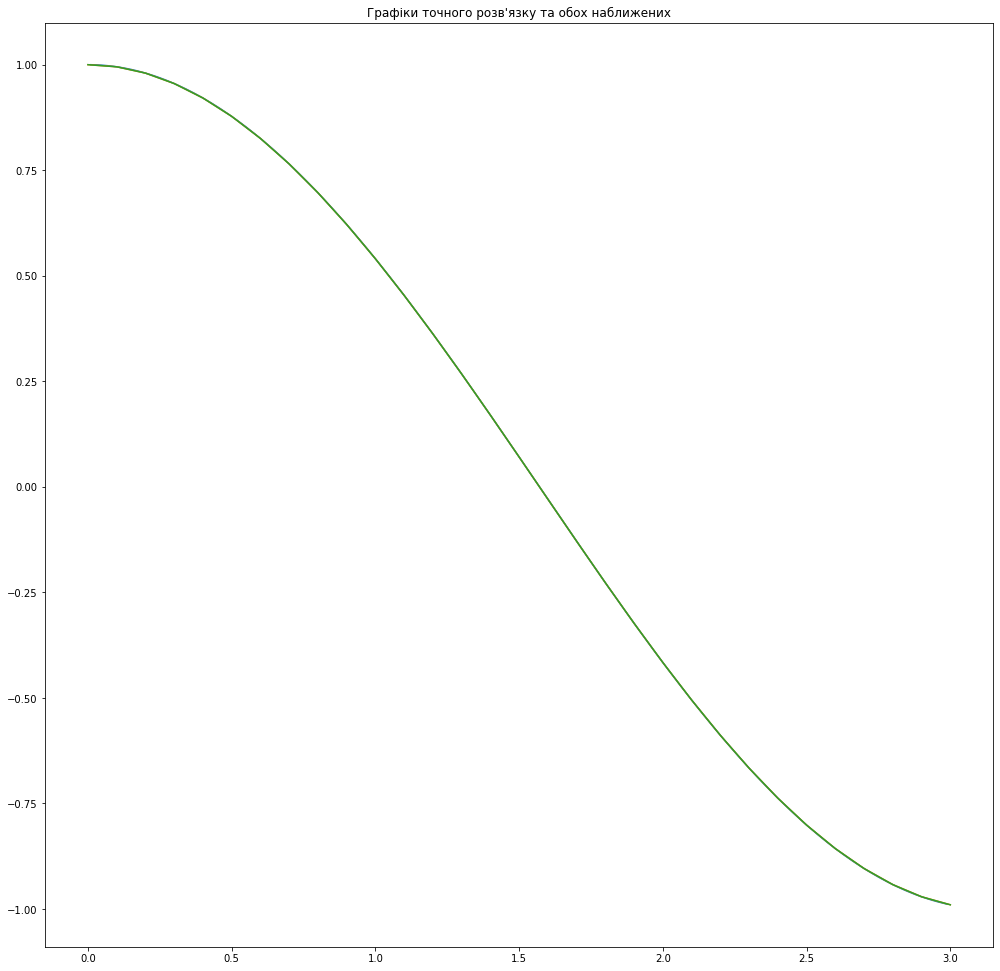


Як видно з графіку, точний розв'язок та наближені майже ідентичні



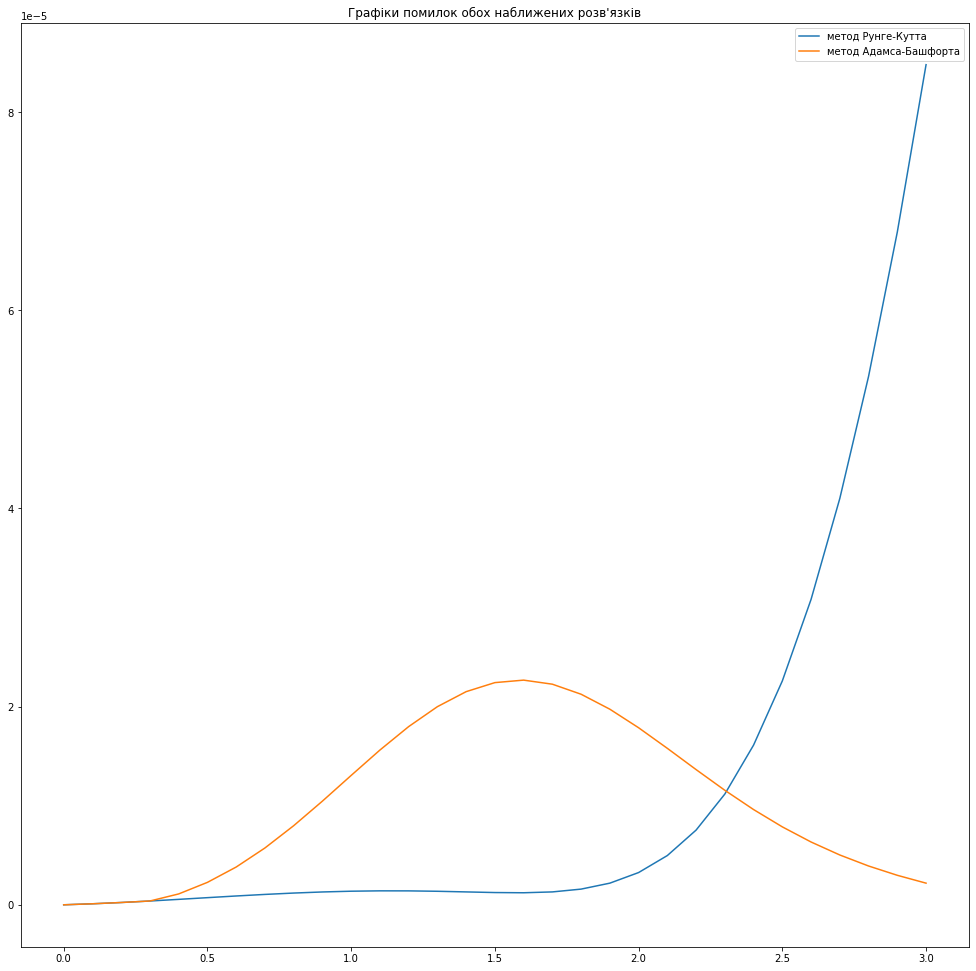

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

f = lambda x, y: (1 - x**2)*y + x**2*np.cos(x) - np.cos(x) - np.sin(x)
h = 0.1
n = 30

def Pudge_Kutt(f, x, y, h, n):
    y_arr = [y]
    x_arr = [x]
    for i in range(0, n):
        k_1 = h*f(x, y)
        k_2 = h*f(x + 1/2*h, y + 1/2*k_1)
        k_3 = h*f(x + 1/2*h, y + 1/2*k_2)
        k_4 = h*f(x+h, y + k_3)
        y = y + 1/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        x = x + h
        y_arr.append(y)
        x_arr.append(x)
    return x_arr, y_arr

def Adams_Bash(f, x_0, y_0, h, n):
    x, y = Pudge_Kutt(f, x_0, y_0, h, 3)
    for i in range(3, n):
        y.append(y[i] + h*(55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))/24)
        x.append(x[i] + h)
    return x, y

x, y1 = Pudge_Kutt(f, 0, 1, h, n)
x, y2 = Adams_Bash(f, 0, 1, h, n)
f_x = list(map(np.cos, x))
table = [[x[i], f_x[i], y1[i], y2[i]] for i in range(0, n)]
print("Таблиця значень функції")
print(pandas.DataFrame(table, columns=['x', 'f(x)', 'Рунге-Кутт', 'Адамс-Башфорт']), '\n')

err1 = [np.absolute(y1[i] - f_x[i]) for i in range(0, n+1)]
err2 = [np.absolute(y2[i] - f_x[i]) for i in range(0, n+1)]

fig, ax = plt.subplots(figsize=(17,17))
xx = [0.01 * k for k in range(1, 10*n)]
ax.plot(xx, list(map(np.cos, xx)))
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_title("Графіки точного розв'язку та обох наближених")
plt.show()

print("\nЯк видно з графіку, точний розв'язок та наближені майже ідентичні\n")

fig, ax = plt.subplots(figsize=(17,17))
ax.plot(x, err1, label="метод Рунге-Кутта")
ax.plot(x, err2, label="метод Адамса-Башфорта")
ax.set_title("Графіки помилок обох наближених розв'язків")
ax.legend()
plt.show()

In [22]:
x1, y1 = Pudge_Kutt(f, 0, 1, 0.1, 30)
x2, y2 = Pudge_Kutt(f, 0, 1, 0.05, 30)
f_x = list(map(np.cos, x))

teor_eps = lambda y_1, y_2: 1/15*np.absolute(y_1 - y_2)
avg_err = sum([teor_eps(y1[i], y2[i]) for i in range(0, 30)]) / 30
print(avg_err)

real_err = sum([np.absolute(y1[i] - f_x[i]) for i in range(0, 30)]) / 30
print(real_err)


0.04001128196387544
9.313969552787158e-06
